# Brazilian Real State: Best Renting Locations in São Paulo

### Case description

#### A Real State company called "Rich Buildings" wishes to buy a property in São Paulo City, Brazil, to rent/sell it for a high price to the senior audience.

The company hires you as a freelancer data science and in a requirements meeting they set up their expectations:

1) Find out what neighborhoods have the best cost benefit for square meters (top 5).

2) For each one of those top 5 neighborhoods, find out: The most frequent top 5 venues.

3) Group similar neighborhoods based on the venues nearby.

Your goal is to provide the company the insights they need to help making the decision: Which neighborhood is the best choice for buying a property based on the targeted audience?

### Dataset

#### Foursquare API: https://foursquare.com/

#### Geocoder: https://geocoder.readthedocs.io/

#### Apartment Prices by Felipecabueno - Kaggle: https://www.kaggle.com/felipecabueno/apartment-prices-in-sao-paulo-br-2020

#### The Apartment Prices dataset cointains 7 columns regarding the attributes of the apartments located in the city of São Paulo, Brazil. The attributes are:

Neighborhood, Square Meters, Number of Bedrooms, Number of Bathrooms, Suites, Parking Spaces and Final Price.


### Deliverables
#### Formal requirements are listed below:

1) Price estimation based on coordinates (regression).

2) Find out the highest square meters/price ratio and order top n descending (n = 20).

3) Clustering of the apartments' features to see if there is any hidden pattern (exploratory analysis/maybe cluster the square_meters/price ratio).

4) Clustering of the nearby venues. This will give the stakeholders the insights for what type of neighborhood is the one in question.

## Item 1: Price estimation using coordinates and apartments' features. (Regression)

### Part 1: Dataset reading and pre-processing data

#### 0. Inital data exploration

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
df = pd.read_csv("apartments_sp.csv")

In [3]:
df.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
0,bras,57,2,1,0,1,385.185
1,santa cecilia,430,4,3,0,5,3200.000
2,bras,57,2,1,0,1,410.000
3,santa cecilia,250,4,3,0,2,1200.000
4,consolacao,177,3,3,0,1,1390.000


In [4]:
df.describe()

,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
count,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000,15703.000000
mean,128.062345,2.860664,2.467045,0.763357,1.844870,995.773735
std,93.374991,0.783342,1.266961,1.069804,1.014796,858.878453
min,23.000000,1.000000,1.000000,0.000000,1.000000,100.000000
25%,65.000000,2.000000,2.000000,0.000000,1.000000,430.000000
50%,96.000000,3.000000,2.000000,0.000000,2.000000,745.000000
75%,160.000000,3.000000,3.000000,1.000000,2.000000,1272.000000
max,864.000000,8.000000,10.000000,8.000000,10.000000,11000.000000


In [5]:
print("The total distinct number of neighborhood entires is: ", df['neighborhood'].unique().size)

The total distinct number of neighborhood entires is:  680


#### Let us create a new column named Cost Benefit Ratio.

Cost Benefit Ratio = Area/Price. The goal of this metric is to measure the cheapest m².

#### 1. Cost Benefit Ratio list creation

We are creating this column to use latter on this analysis, when we rank the top 10 areas of best CB Ratio.

In [6]:
cb_ratio_list = []

for value in df.values:
    #print(value)
    cb_ratio = value[1]/value[6]
    cb_ratio_list.append(cb_ratio)
#print(cb_ratio_list)

#### 2. Coordinates extraction using Geocoder

This part can generate 2 files:

- Latlng_list.txt

    This file represents the pure result of the ARCGIS API stored in a python list.


- Apartments_coordinates.csv

    This file represents the formatted result of the ARCGIS API stored in a CSV, with the neighborhood information and ready to be used with Pandas.

In [7]:
# Gets all distinct neighborhood names for us to use in the coordinates ARCGIS API to obtain the coordinates values.

postal_codes = list(df['neighborhood'].to_list())
postal_codes = list(set(postal_codes))
#print(postal_codes)

In [8]:
import geocoder # import geocoder
from time import sleep

#initialize your variable to None
lat_lng_coords = None
latlng_list = []
latitude_list = []
longitude_list = []

# Used for testing the ARCGIS API.

#postal_codes = ['01000-xxx']
#postal_codes = ['bras', 'santa cecilia']


#print(postal_codes)

In [9]:
# Just execute if you need to generate dataframe and read coordinates information from latlng_list.txt

#try:
#    with open('latlng_list.txt', 'r') as file:
#        latlng_list = json.loads(str(file.read())
#        latitude_list = [latlng_list[i][0] for i in range(0, len(latlng_list))]
#        longitude_list = [latlng_list[i][1] for i in range(0, len(latlng_list))]
#                                 
#        print("latitude_list = ", latitude_list)
#        print("longitude_list = ", longitude_list)
#except:
#    import traceback
#    traceback.print_exc()


In [10]:
# JUST EXECUTE IF THE COORDINATES CSV FILE 'APARTMENTS_COORDINATES.CSV' IS NOT PRESENT.

#loop until you get the coordinates - API CALL ARCGIS
#for postal_code in postal_codes:
#    print(postal_code)
#    while(lat_lng_coords is None):
#        print("Entrou no loop Geocoder")
#        g = geocoder.arcgis('{}, São Paulo, São Paulo'.format(postal_code))
#        lat_lng_coords = g.latlng
#    latlng_list.append(lat_lng_coords)
#    latitude_list.append(lat_lng_coords[0])
#    longitude_list.append(lat_lng_coords[1])
#    print("lat_lng_coords = ", lat_lng_coords)
#    print("latitude_list = ", latitude_list)
#    print("longitude_list = ", longitude_list)
#    lat_lng_coords = None

In [11]:
# Generates NEIGHBORHOOD vs COORDINATES Dataframe based on results of the ARCGIS API. USE ONLY IF 'APARTMENTS_COORDINATES.CSV'
# is not present!!
#coord_df = pd.DataFrame({'neighborhood': postal_codes, 'latitude': latitude_list, 'longitude': longitude_list})
#print("Final latlng_list = ", latlng_list)
#coord_df.to_csv('apartments_coordinates.csv', index=False)

In [12]:
#with open('latlng_list.txt', 'w') as file:
#    file.write(str(latlng_list))

In [13]:
import traceback
try:
    coord_df = pd.read_csv('apartments_coordinates.csv')
except:
    traceback.print_exc()

In [14]:
coord_df.head()

,neighborhood,latitude,longitude
0,vila bela,-23.61862,-46.44618
1,jardim redil,-23.53157,-46.68577
2,vila parque jabaquara,-23.63792,-46.65575
3,jardim mitsutani,-23.64742,-46.79034
4,jardim das laranjeiras,-23.51000,-46.66604


#### 3. Label Encoding and Data Standardization

Below there is a function called NeighborhoodToNumerical() converting categorial labels to numerical, just for demonstration purposes of the LabelEncoder.

Also, we have the function StdScaler that normalizes the entire dataset using Normal Curve Standardization. We will use this standardization to have non biased correlation coeficients.

<img src="https://miro.medium.com/max/2460/1*ACOjyKDaAi5kqZa5wT2Zjg.png">

In [15]:
# Defining and using a Categorical Feature transform to Numerical ordinal feature.

from sklearn.preprocessing import LabelEncoder

def NeighborhoodToNumerical(previsores):

    label_encoder = LabelEncoder()

    previsores[:,0] = label_encoder.fit_transform(previsores[:,0])


In [16]:
# Not needed.

# Updating the first column of the df Dataframe to numerical variable

#j = 0
#for value in df.values:
#    #print(value)
#    #print(previsores[j,0])
#    df.iloc[j,0] = float(previsores[j,0])
#    #print(df.values[j,0])
#    j = j + 1
#    #if j == 10:
#        #break

In [17]:
# Creating the Standardization function.

from sklearn.preprocessing import StandardScaler

def StdScaler(df):

    std_scaler = StandardScaler()
    df = pd.DataFrame(std_scaler.fit_transform(df))
    return df

In [18]:
# Renaming Dataframe columns.

df.columns = ['neighborhood', 'square_meters','bedrooms','bathrooms','suites','parking_spaces','final_price']

#### 4. Feature Selection

To properly select the features that should enter the regression model, it is recommended by the literature to do correlation analysis.

The correlation analysis can be found under Item 2, Part 1 of this notebook. There we can see that all features that are selected below have positive Pearson Correlation above 0.5 (moderate/strong correlation).

We have to insert the coordinates into the dataframe before start modeling.

In [19]:
df_original = df.copy() # Keeping the original Dataframe stored in memory.
df_original.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
0,bras,57,2,1,0,1,385.185
1,santa cecilia,430,4,3,0,5,3200.000
2,bras,57,2,1,0,1,410.000
3,santa cecilia,250,4,3,0,2,1200.000
4,consolacao,177,3,3,0,1,1390.000


In [20]:
# Full outer join with coordinates table (coord_df)
df = pd.merge(df,coord_df,on='neighborhood',how='outer')

In [21]:
# Reorders the columns.
latitude = df.pop('latitude')
longitude = df.pop('longitude')
neighborhood = df.pop('neighborhood')
df.insert(0, 'longitude', longitude)
df.insert(0, 'latitude', latitude)
df

,latitude,longitude,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
0,-23.542770,-46.62000,57,2,1,0,1,385.185
1,-23.542770,-46.62000,57,2,1,0,1,410.000
2,-23.542770,-46.62000,59,2,1,0,1,403.235
3,-23.542770,-46.62000,62,2,1,0,1,420.000
4,-23.542770,-46.62000,61,2,1,0,1,325.000
...,...,...,...,...,...,...,...,...
15698,-23.696770,-46.63593,49,2,1,0,1,270.000
15699,-23.657285,-46.78178,41,2,1,0,1,190.178
15700,-23.674330,-46.63832,51,2,1,0,1,230.000
15701,-23.586010,-46.50063,50,2,1,0,1,260.000


In [22]:
df_original = df_original.assign(cost_benefit_ratio = cb_ratio_list)
df_original = pd.merge(df_original,coord_df,on='neighborhood',how='outer')

In [23]:
df_original.head()

,neighborhood,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio,latitude,longitude
0,bras,57,2,1,0,1,385.185,0.147981,-23.54277,-46.62
1,bras,57,2,1,0,1,410.000,0.139024,-23.54277,-46.62
2,bras,59,2,1,0,1,403.235,0.146317,-23.54277,-46.62
3,bras,62,2,1,0,1,420.000,0.147619,-23.54277,-46.62
4,bras,61,2,1,0,1,325.000,0.187692,-23.54277,-46.62


In [24]:
df.head()

,latitude,longitude,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
0,-23.54277,-46.62,57,2,1,0,1,385.185
1,-23.54277,-46.62,57,2,1,0,1,410.000
2,-23.54277,-46.62,59,2,1,0,1,403.235
3,-23.54277,-46.62,62,2,1,0,1,420.000
4,-23.54277,-46.62,61,2,1,0,1,325.000


In [25]:
previsores = df.iloc[:,0:7].values
classe = df.iloc[:,7].values
print(previsores)
print(classe)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(previsores, classe, test_size = 0.2, random_state=42)

[[-23.54277 -46.62     57.      ...   1.        0.        1.     ]
 [-23.54277 -46.62     57.      ...   1.        0.        1.     ]
 [-23.54277 -46.62     59.      ...   1.        0.        1.     ]
 ...
 [-23.67433 -46.63832  51.      ...   1.        0.        1.     ]
 [-23.58601 -46.50063  50.      ...   1.        0.        1.     ]
 [-23.64272 -46.74509  54.      ...   1.        0.        1.     ]]
[385.185 410.    403.235 ... 230.    260.    260.   ]


#### 5. Regression pre-processsing pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Pipeline to process data entering the model.

# 1. Imputer
# 2. Standard Scaler
# 3. Polynomial Features
# 4. Linear Regression

steps = [('imputer', SimpleImputer(strategy='median')), #Imputer
                       ('std_scaler', StandardScaler()), ('mv_poly_features', PolynomialFeatures()), ('regression', LinearRegression())]

parameters = [{'mv_poly_features__degree' : [1, 2, 3, 4, 5]}]

reg_pipeline = Pipeline(steps)

### Part 2: Estimation of Apartments' Price - Regression Modeling

#### 1. Linear Regression Modeling: Traning and Validation

We will evaluate the validation performance of the linear regression using Grid Search, cross validation using 10-fold.

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid_search = GridSearchCV(reg_pipeline, parameters, cv=10, scoring='r2')

In [29]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('std_scaler', StandardScaler()),
                                       ('mv_poly_features',
                                        PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid=[{'mv_poly_features__degree': [1, 2, 3, 4, 5]}],
             scoring='r2')

In [30]:
grid_search.best_params_

{'mv_poly_features__degree': 1}

In [31]:
grid_search.best_estimator_

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler()),
                ('mv_poly_features', PolynomialFeatures(degree=1)),
                ('regression', LinearRegression())])

In [32]:
grid_search.cv_results_

{'mean_fit_time': array([0.03620865, 0.08179214, 0.44484665, 0.93764946, 3.89189646]),
 'std_fit_time': array([0.0121007 , 0.00594522, 0.00916525, 0.01450266, 0.6777093 ]),
 'mean_score_time': array([0.00246754, 0.003281  , 0.00643532, 0.01096539, 0.02394564]),
 'std_score_time': array([0.00072534, 0.00065269, 0.00082371, 0.00070715, 0.00203717]),
 'param_mv_poly_features__degree': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'mv_poly_features__degree': 1},
  {'mv_poly_features__degree': 2},
  {'mv_poly_features__degree': 3},
  {'mv_poly_features__degree': 4},
  {'mv_poly_features__degree': 5}],
 'split0_test_score': array([ 6.68503036e-01,  7.07290257e-01,  7.28088074e-01, -7.38211705e+00,
        -1.00826788e+03]),
 'split1_test_score': array([ 6.50976841e-01,  6.56788642e-01,  1.72588821e-01, -1.33188668e+02,
        -2.79393140e+04]),
 'split2_test_score': array([ 6.941204

Here we can see negative values for R², which means very bad fit of the models, according to the following article.

Link: https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean#:~:text=3%20Answers&text=R2%20can%20be%20negative,did%20not%20set%20an%20intercept

Based on the data provided by the Search Grid algorithm, we can conclude that the best model is the 1st degree linear regresssion (line fit).

In [33]:
final_score = grid_search.cv_results_['mean_test_score'][0] # Mean of the 1st degree Linear Regresssion
final_score_sd = grid_search.cv_results_['std_test_score'][0] # Deviation of the 1st degree Linear Regresssion
print(f"The R² score for this model is: {final_score}.")
print(f"The R² standard deviation for this model is: {final_score_sd}.")
print("")
print(f"R² is in [{final_score-final_score_sd}, {final_score+final_score_sd}]")

The R² score for this model is: 0.6705569488462791.
The R² standard deviation for this model is: 0.01767189853988985.

R² is in [0.6528850503063893, 0.688228847386169]


#### 2. Model Testing

In this section, we will test a separate dataset to check if the model is working properly.

In [34]:
print(X_test)
estimated_price = grid_search.predict(X_test)
print("Estimated price: ", estimated_price)

[[-23.56001 -46.64523 167.      ...   2.        0.        1.     ]
 [-23.562   -46.68597  50.      ...   1.        0.        1.     ]
 [-23.60749 -46.64162  83.      ...   2.        1.        1.     ]
 ...
 [-23.58453 -46.63811 130.      ...   2.        1.        2.     ]
 [-23.53237 -46.73613  77.      ...   2.        0.        2.     ]
 [-23.61915 -46.74068 220.      ...   2.        0.        4.     ]]
Estimated price:  [1033.40312192  364.98178328  587.43910072 ... 1014.09973761  736.5318491
 1815.29723737]


In [35]:
df.head()

,latitude,longitude,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price
0,-23.54277,-46.62,57,2,1,0,1,385.185
1,-23.54277,-46.62,57,2,1,0,1,410.000
2,-23.54277,-46.62,59,2,1,0,1,403.235
3,-23.54277,-46.62,62,2,1,0,1,420.000
4,-23.54277,-46.62,61,2,1,0,1,325.000


In [36]:
result_df = pd.DataFrame({'latitude' : X_test[:,0], 'longitude': X_test[:,1], 'squared_meters' : X_test[:,2], 'bedrooms' : X_test[:,3], 'bathrooms' : X_test[:,4], 'suites' : X_test[:,5], 'parking_spaces' : X_test[:,6], 'estimated_price' : estimated_price})
try:
    result_df.to_csv('regression_result.csv')
except:
    pass
# Inner join with neighborhood table (df_original)
result_df = pd.merge(result_df,coord_df,on='latitude',how='inner')
result_df.pop('longitude_y')
result_df.rename(columns={'longitude_x' : 'longitude'}, inplace=True)

neighborhood_column = result_df.pop('neighborhood')
result_df.insert(0, 'neighborhood', neighborhood_column)

result_df.head(20)

,neighborhood,latitude,longitude,squared_meters,bedrooms,bathrooms,suites,parking_spaces,estimated_price
0,bela vista,-23.56001,-46.64523,167.0,3.0,2.0,0.0,1.0,1033.403122
1,bela vista,-23.56001,-46.64523,84.0,2.0,2.0,0.0,2.0,744.299656
2,bela vista,-23.56001,-46.64523,458.0,4.0,6.0,4.0,2.0,3154.421104
3,bela vista,-23.56001,-46.64523,38.0,1.0,1.0,0.0,1.0,278.658887
4,bela vista,-23.56001,-46.64523,65.0,3.0,2.0,1.0,1.0,491.642353
5,bela vista,-23.56001,-46.64523,60.0,2.0,2.0,0.0,1.0,458.776112
6,bela vista,-23.56001,-46.64523,110.0,3.0,3.0,0.0,1.0,793.261829
7,bela vista,-23.56001,-46.64523,144.0,2.0,2.0,1.0,1.0,942.463177
8,bela vista,-23.56001,-46.64523,96.0,2.0,1.0,0.0,1.0,583.141037
9,bela vista,-23.56001,-46.64523,44.0,1.0,1.0,0.0,1.0,311.737849


#### 3. Price Calculator Implementation

#### Takeaway of Regression Model

We now implement a blackbox software section for end-users to import datasets and use the regression model.

In [50]:
#import linear_model

#linear_model('apartments_sample.csv')

## Item 2: Listing top N best Cost Benefit neighborhoods.

### Part 1: Dataframe Cost Benefit Ratio Analysis

#### 1. Correlation and Histogram/Frequency Analysis


In this step we will perform correlation analysis in order to check what are the variables that most affect the cost benefit ratio.

1. Pearson Correlation

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/602e9087d7a3c4de443b86c734d7434ae12890bc">


In [51]:
df_original.head()

,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio,latitude,longitude
0,57,2,1,0,1,385.185,0.147981,-23.54277,-46.62
1,57,2,1,0,1,410.000,0.139024,-23.54277,-46.62
2,59,2,1,0,1,403.235,0.146317,-23.54277,-46.62
3,62,2,1,0,1,420.000,0.147619,-23.54277,-46.62
4,61,2,1,0,1,325.000,0.187692,-23.54277,-46.62


In [53]:
try:
    df_corr = df_original
    df_corr.pop('neighborhood')
    df_corr.head()
except:
    pass

In [55]:
try:
    df_corr.pop('latitude')
    df_corr.pop('longitude')
except:
    pass

In [56]:
df_corr.head()

,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
0,57,2,1,0,1,385.185,0.147981
1,57,2,1,0,1,410.000,0.139024
2,59,2,1,0,1,403.235,0.146317
3,62,2,1,0,1,420.000,0.147619
4,61,2,1,0,1,325.000,0.187692


In [57]:
#df['neighborhood'] = df['neighborhood'].astype('float64')
df_corr = StdScaler(df_corr)
df_corr.columns = ['square_meters','bedrooms','bathrooms','suites','parking_spaces','final_price', 'cost_benefit_ratio']
df_corr.head()

,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
0,-0.761067,-1.098742,-1.157961,-0.713571,-0.832578,-0.710937,-0.031446
1,-0.761067,-1.098742,-1.157961,-0.713571,-0.832578,-0.682043,-0.175120
2,-0.739647,-1.098742,-1.157961,-0.713571,-0.832578,-0.689920,-0.058142
3,-0.707518,-1.098742,-1.157961,-0.713571,-0.832578,-0.670400,-0.037250
4,-0.718227,-1.098742,-1.157961,-0.713571,-0.832578,-0.781013,0.605580


In [58]:
corr_matrix = df_corr.corr(method='pearson')

In [59]:
corr_matrix

,square_meters,bedrooms,bathrooms,suites,parking_spaces,final_price,cost_benefit_ratio
square_meters,1.000000,0.647606,0.695954,0.587570,0.694003,0.794495,0.043607
bedrooms,0.647606,1.000000,0.659658,0.510709,0.622862,0.565100,-0.068899
bathrooms,0.695954,0.659658,1.000000,0.804254,0.720309,0.660650,-0.188119
suites,0.587570,0.510709,0.804254,1.000000,0.661981,0.567129,-0.133483
parking_spaces,0.694003,0.622862,0.720309,0.661981,1.000000,0.672842,-0.148314
final_price,0.794495,0.565100,0.660650,0.567129,0.672842,1.000000,-0.396810
cost_benefit_ratio,0.043607,-0.068899,-0.188119,-0.133483,-0.148314,-0.396810,1.000000


#### Takeaway of Correlation

Scalar Standardization to erase the bias per class.

We can observe the following points of interest in this Pearson correlation matrix:

1. The top 3 variables that negatively affect the cost benefit are (excluding final price):

    - Bathrooms
    - Parking Spaces
    - Suites
    

2. The top 3 variables that are correlated to the final price are: 

    - Square Meters
    - Number of Parking Spaces
    - Number of Bathrooms.
    

3. The correlation of Square Meters and Number of Bathrooms is around 0.7. This indicates a possibly strong correlation, could mean that the room with the greatest impact in the apartment area overall is the bathroom. It is also the room with the worst cost benefit correlation, which means that from all available parameters, it is the one that has the greatest impact on making an apartment more expensive.

2. Histogram

array([[<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'cost_benefit_ratio'}>],
       [<AxesSubplot:title={'center':'final_price'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'parking_spaces'}>,
        <AxesSubplot:title={'center':'square_meters'}>,
        <AxesSubplot:title={'center':'suites'}>]], dtype=object)

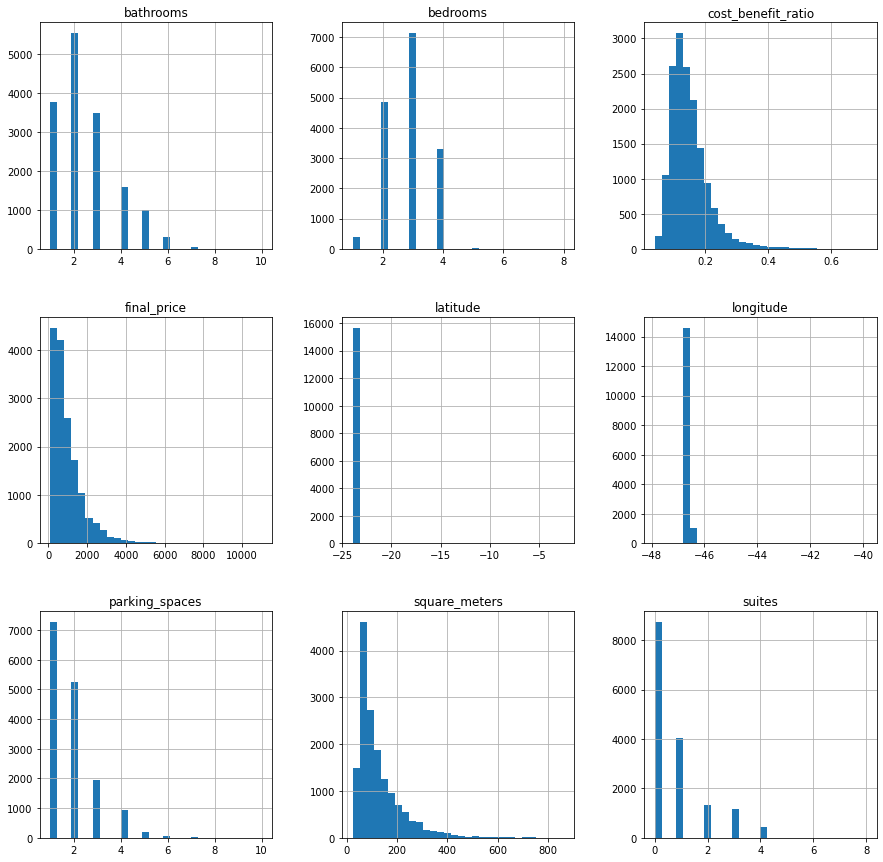

In [41]:
df_original.hist(figsize=(15,15), bins=30)

In [42]:
# Mean of the Cost Benefit Ratio.
df_original['cost_benefit_ratio'].values.mean()

0.14994115068618472

In [43]:
# Maximum value of the Cost Benefit Ratio.
df_original['cost_benefit_ratio'].values.min()

0.04033333333333333

In [44]:
# Mean of the Square Meters.
df_original['square_meters'].mean()

128.06234477488377

#### Takeaway of Histogram Analysis

The histograms show the most frequent occurrences for all the features in the Dataframe.

The most frequent features are listed below:

1. Bathrooms = 2
2. Bedrooms = 3
3. Cost Benefit Mean = BRL 7660,00 per meter squared
4. Maximum Cost Benefit = BRL 1408,00 per meter squared
5. Final Price Mean = BRL 995.000,00
6. Parking Spaces = 1
7. Square Meters Mean = 128,06 m^2
8. Suites = 1

#### 2. Listing of top N best Cost Benefit

We can select top 20 most expensive neighborhoods as a fit requirement to the senior audience, and then apply cost benefit ratio to determine the cheapest neighborhoods of this group.

First we add the column Final Price to the Neighborhood column.

In [54]:
df_neighborhood_vs_price = pd.DataFrame([df_original["neighborhood"], df_original["final_price"]],dtype=float).transpose()

In [55]:
df_neighborhood_vs_price["final_price"] = df_neighborhood_vs_price["final_price"].astype('float')

In [56]:
df_neighborhood_vs_price_topN = df_neighborhood_vs_price.groupby(["neighborhood"]).mean().sort_values(by="final_price",ascending=False)
df_neighborhood_vs_price_topN.head(20)

,final_price
neighborhood,
jardim vitoria,3400.000000
jardim paulistano,3145.777778
jardim raposo tavares,2950.000000
pacaembu,2848.037037
jardim universidade pinheiros,2834.000000
higienopolis,2430.603664
jardim europa,2320.363636
jardim vitoria regia,2265.500000
cerqueira cesar,2260.280952


And now we can add Cost Benefit to the Neighborhood column.

In [57]:
df_neighborhood_vs_cb = pd.DataFrame([df_original["neighborhood"], df_original["cost_benefit_ratio"]],dtype=float).transpose()

In [58]:
df_neighborhood_vs_cb["cost_benefit_ratio"] = df_neighborhood_vs_cb["cost_benefit_ratio"].astype('float')

In [59]:
df_neighborhood_vs_cb_topN = df_neighborhood_vs_cb.groupby(["neighborhood"]).mean().sort_values(by="cost_benefit_ratio",ascending=False)
df_neighborhood_vs_cb_topN.head(20)

,cost_benefit_ratio
neighborhood,
sitio areiao,0.520000
conjunto habitacional santa etelvina ii,0.476923
conjunto habitacional vila nova cachoeirinha,0.462500
jardim sydney,0.460000
jardim dom jose,0.458333
cidade tiradentes,0.447738
vila robertina,0.435294
conjunto habitacional fazenda do carmo,0.433333
vila caiuba,0.431410


Finally, we can merge both Dataframes and get the best Cost Benefit Ratio from the 20 most expensive neighborhoods in São Paulo.

In [60]:
price_vs_cb_df = pd.merge(df_neighborhood_vs_price_topN,df_neighborhood_vs_cb_topN,on='neighborhood',how='inner')

In [68]:
price_vs_cb_df_top20 = price_vs_cb_df.head(20).sort_values(by="cost_benefit_ratio",ascending=False)
price_vs_cb_df_top20.head(20)

,final_price,cost_benefit_ratio
neighborhood,,
jardim vitoria regia,2265.500000,0.210027
jardim belgica,2000.000000,0.205500
jardim fonte do morumbi,2072.727273,0.189551
jardim morumbi,2236.111111,0.148837
jardim analia franco,2179.311927,0.144494
pacaembu,2848.037037,0.127355
parque colonial,1994.916667,0.126834
campo belo,1997.058765,0.125064
jardim universidade pinheiros,2834.000000,0.109035


#### Takeaway of Top 20 most expensive with Cost Benefit Ratio.

We can conclude, based on this top 20, that the best neighborhood that fits senior/rich audience AND has the lowest cost is: Jardim Vitoria Regia

We now save results to an Excel file.

In [66]:
try:
    price_vs_cb_df.to_excel("best_neighborhoods_cost_benefit.xlsx")
except ModuleNotFoundError:
    !conda install --yes openpyxl
    price_vs_cb_df.to_excel("best_neighborhoods_cost_benefit.xlsx")
except:
    pass

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\zfern\Anaconda3\envs\Anaconda3

  added / updated specs:
    - openpyxl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.4.13  |       haa95532_1         115 KB
    certifi-2020.12.5          |   py37haa95532_0         141 KB
    et_xmlfile-1.1.0           |   py37haa95532_0          10 KB
    openpyxl-3.0.7             |     pyhd3eb1b0_0         159 KB
    openssl-1.1.1k             |       h2bbff1b_0         4.8 MB
    ------------------------------------------------------------
                                           Total:         5.2 MB

The following NEW packages will be INSTALLED:

  et_xmlfile         pkgs/main/win-64::et_xmlfile-1.1.0-py37haa95532_0
  jdcal              pkgs/main/noarch::jdcal-1.4.1-py_0
  openpyxl           pkgs/main/noarch::openpyxl-3.0.7-pyhd



==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda




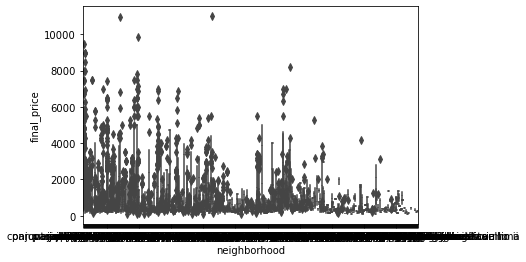

In [51]:
import seaborn as sns

ax = sns.boxplot(x="neighborhood", y="final_price", data=df_neighborhood_vs_price)